# **Algoritmo de la Implementación de la transformación en PDFs**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Parámetros (ajustar según corresponda)
G = 23
a = 2

# Paso 1: Generar muestras de X ~ N(1,2^2)
N = 10000 + G * 100
X = np.random.normal(1, 2, N)

# Paso 2: Filtro LTI con h[k] = [1/a, 1, 1/a]
H = [1/a, 1, 1/a]
Y = lfilter(H, [1], X)

# Paso 2b: Filtro promedio simple (ventana de G muestras)
filtro_prom = np.ones(G) / G
Y_filt = lfilter(filtro_prom, [1], Y)

# Paso 3: Graficar histogramas normalizados
plt.figure(figsize=(10, 6))
plt.hist(X, bins=50, density=True, alpha=0.5, label='Entrada (X)')
plt.hist(Y_filt, bins=50, density=True, alpha=0.5, label='Salida (Y filtrada)')
plt.legend()
plt.title("Comparación de PDFs entrada/salida")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()

# **Implementación del algoritmo en función**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

def procesar_y_graficar(G=23, a=2):
    """
    Genera una señal X con distribución normal, la filtra con un sistema LTI y un filtro promedio,
    y grafica los histogramas normalizados de la señal original y la señal filtrada.

    Parámetros:
    G (int): Tamaño de la ventana para el filtro promedio simple.
    a (float): Parámetro del filtro LTI.
    """
    # Paso 1: Generar muestras de X ~ N(1, 2^2)
    N = 10000 + G * 100
    X = np.random.normal(1, 2, N)

    # Paso 2: Filtro LTI con h[k] = [1/a, 1, 1/a]
    H = [1/a, 1, 1/a]
    Y = lfilter(H, [1], X)

    # Paso 2b: Filtro promedio simple (ventana de G muestras)
    filtro_prom = np.ones(G) / G
    Y_filt = lfilter(filtro_prom, [1], Y)

    # Paso 3: Graficar histogramas normalizados
    plt.figure(figsize=(10, 6))
    plt.hist(X, bins=50, density=True, alpha=0.5, label='Entrada (X)')
    plt.hist(Y_filt, bins=50, density=True, alpha=0.5, label='Salida (Y filtrada)')
    plt.legend()
    plt.title("Comparación de PDFs entrada/salida")
    plt.xlabel("Valor")
    plt.ylabel("Densidad")
    plt.grid(True)
    plt.show()


# **Algoritmo implementado con Interpolación**

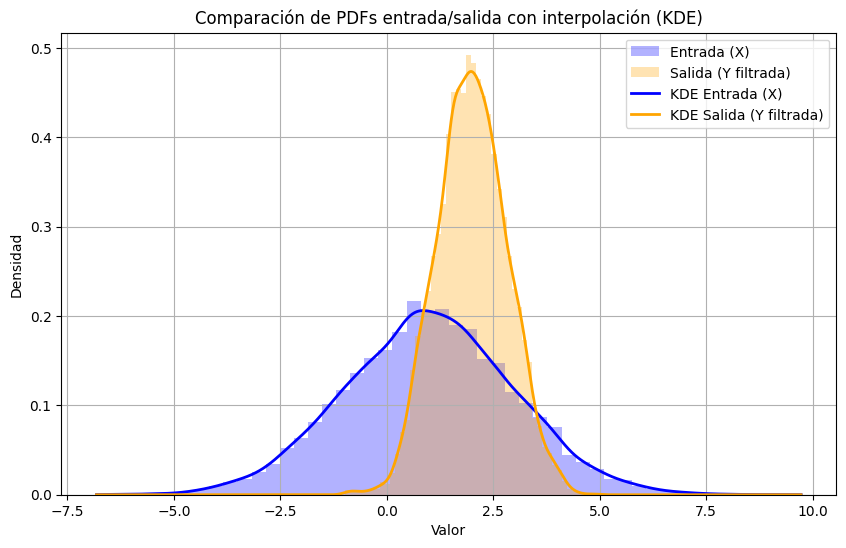

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy.stats import gaussian_kde

# Parámetros
G = 23
a = 2

# Paso 1: Generar muestras de X ~ N(1,2^2)
N = 10000 + G * 100
X = np.random.normal(1, 2, N)

# Paso 2: Filtro LTI con h[k] = [1/a, 1, 1/a]
H = [1/a, 1, 1/a]
Y = lfilter(H, [1], X)

# Paso 2b: Filtro promedio simple (ventana de G muestras)
filtro_prom = np.ones(G) / G
Y_filt = lfilter(filtro_prom, [1], Y)

# Paso 3: Interpolación usando KDE (estimación de densidad)
kde_X = gaussian_kde(X)
kde_Y_filt = gaussian_kde(Y_filt)

# Crear un rango común de valores para evaluar las curvas
x_vals = np.linspace(min(min(X), min(Y_filt)), max(max(X), max(Y_filt)), 1000)

# Paso 4: Graficar histogramas y curvas suavizadas
plt.figure(figsize=(10, 6))
plt.hist(X, bins=50, density=True, alpha=0.3, label='Entrada (X)', color='blue')
plt.hist(Y_filt, bins=50, density=True, alpha=0.3, label='Salida (Y filtrada)', color='orange')

# Añadir curvas suavizadas
plt.plot(x_vals, kde_X(x_vals), color='blue', lw=2, label='KDE Entrada (X)')
plt.plot(x_vals, kde_Y_filt(x_vals), color='orange', lw=2, label='KDE Salida (Y filtrada)')

plt.legend()
plt.title("Comparación de PDFs entrada/salida con interpolación (KDE)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()